# Softmax 

1)numpy package is used for Scientific Computing.



2)matplot package is used for ploting of data 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import platform
platform.machine()

'x86_64'

1)N is used to define the number of points per class


2)Two dimension data is created


3)Three class of data is generated

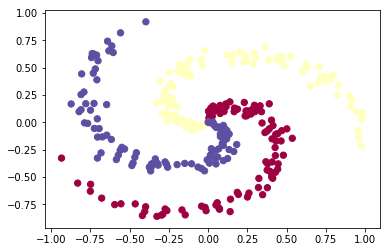

In [13]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

initialization of weights and bias

In [14]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [15]:
W

array([[ 0.0006972 , -0.00550979,  0.00255356],
       [-0.00897044, -0.00783735,  0.01114241]])

In [16]:
b

array([[0., 0., 0.]])

scores value is calculated with the help of weights and bias for a linear classifer

In [17]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.29


In [18]:
X

array([[-0.00000000e+00,  0.00000000e+00],
       [ 7.84817062e-04,  1.00704750e-02],
       [ 3.00991357e-03,  1.99765373e-02],
       [ 1.14471466e-02,  2.80577347e-02],
       [ 5.48426298e-03,  4.00301054e-02],
       [ 9.93538436e-03,  4.95181610e-02],
       [ 2.62654541e-02,  5.46188658e-02],
       [ 1.17399335e-02,  6.97256324e-02],
       [ 2.47575180e-02,  7.69221114e-02],
       [ 1.62844604e-02,  8.94386894e-02],
       [ 1.96962314e-03,  1.00990896e-01],
       [ 7.64273601e-02,  8.06507138e-02],
       [ 5.75127724e-02,  1.06698919e-01],
       [ 1.74368094e-02,  1.30150283e-01],
       [ 1.01364408e-01,  9.86063696e-02],
       [ 3.10656085e-02,  1.48296221e-01],
       [ 7.23567320e-02,  1.44513968e-01],
       [ 7.61388171e-02,  1.53914481e-01],
       [ 1.13838267e-01,  1.41769885e-01],
       [ 1.65502535e-01,  9.71693743e-02],
       [ 1.12454732e-01,  1.67827576e-01],
       [ 1.67688585e-01,  1.29907456e-01],
       [ 1.87132874e-01,  1.19849921e-01],
       [ 1.

Normalization is done for each data

In [19]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [20]:
num_examples

300

In [21]:
correct_logprobs = -np.log(probs[range(num_examples),y])

In [22]:
correct_logprobs

array([1.09861229, 1.09868247, 1.09874942, 1.09879443, 1.0988879 ,
       1.09894868, 1.09896117, 1.09908928, 1.09912144, 1.09922245,
       1.09932509, 1.09907306, 1.09928515, 1.09950949, 1.0991643 ,
       1.0996185 , 1.09953193, 1.09959317, 1.09945247, 1.09906132,
       1.09963942, 1.09929044, 1.09919096, 1.09973373, 1.09868216,
       1.09867546, 1.0989996 , 1.09897685, 1.09875374, 1.09956385,
       1.0990323 , 1.09886626, 1.09896861, 1.09928728, 1.09806816,
       1.09880566, 1.09919833, 1.09742531, 1.09750227, 1.0976249 ,
       1.09816815, 1.09780408, 1.09924673, 1.09694998, 1.09720578,
       1.09723772, 1.09677761, 1.09738835, 1.09636312, 1.09673014,
       1.09745985, 1.09552834, 1.09583921, 1.09538762, 1.09545815,
       1.09680106, 1.09578977, 1.094984  , 1.09527837, 1.0948779 ,
       1.09452138, 1.09494263, 1.09476444, 1.09455462, 1.09446815,
       1.09440053, 1.0938237 , 1.0939376 , 1.09367989, 1.09367018,
       1.09384221, 1.093447  , 1.09343016, 1.09334462, 1.09343

In [23]:
probs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33330994, 0.33331212, 0.33337794],
       [0.33328763, 0.33328894, 0.33342343],
       [0.33327262, 0.33325954, 0.33346784],
       [0.33324148, 0.33324525, 0.33351328],
       [0.33322122, 0.33321937, 0.33355941],
       [0.33321706, 0.33318336, 0.33359958],
       [0.33317437, 0.33317642, 0.33364921],
       [0.33316366, 0.3331415 , 0.33369484],
       [0.33313001, 0.3331301 , 0.33373989],
       [0.33309582, 0.33312987, 0.33377432],
       [0.33317978, 0.3330522 , 0.33376802],
       [0.33310912, 0.33303049, 0.33386039],
       [0.3330344 , 0.33304747, 0.33391813],
       [0.33314938, 0.33297704, 0.33387358],
       [0.3329981 , 0.33298984, 0.33401206],
       [0.33302693, 0.3329319 , 0.33404117],
       [0.33300653, 0.33290725, 0.33408622],
       [0.33305339, 0.33287161, 0.334075  ],
       [0.33318369, 0.33287824, 0.33393807],
       [0.33299113, 0.33282207, 0.3341868 ],
       [0.33310736, 0.33280981, 0.33408282],
       [0.

In [24]:
correct_logprobs.shape

(300,)

Loss function is calculated

Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1.

 Regularization is used to prevent overfitting in model

In [25]:
# compute the loss: average cross-entropy loss and regularization
reg = 1e-3
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
Loss = data_loss + reg_loss

In [26]:
reg

0.001

In [30]:
data_loss 

1.099044482882453

In [20]:
Loss

1.0992066914815555

In [31]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [32]:
probs

array([[-1.66944753e-03,  1.54320988e-09,  1.54320988e-09],
       [-1.66944753e-03,  1.54310651e-09,  1.54324811e-09],
       [-1.66944753e-03,  1.54299062e-09,  1.54323300e-09],
       ...,
       [ 1.53839555e-09,  1.53219849e-09, -1.66944752e-03],
       [ 1.53572806e-09,  1.53412052e-09, -1.66944751e-03],
       [ 1.54488167e-09,  1.52784451e-09, -1.66944752e-03]])

In [29]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

In [30]:
dW

array([[-0.03565809, -0.04728493,  0.09937909],
       [ 0.09702679, -0.08686828,  0.02094161]])

In [10]:
# perform a parameter update
step_size = 1e-0
W += -step_size * dW
b += -step_size * db

In [11]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098765
iteration 1000: loss 0.310350
iteration 2000: loss 0.258708
iteration 3000: loss 0.254830
iteration 4000: loss 0.254284
iteration 5000: loss 0.254032
iteration 6000: loss 0.253892
iteration 7000: loss 0.253696
iteration 8000: loss 0.253595
iteration 9000: loss 0.253518


In [12]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.99
